<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#PCA-Dimension-Reduction" data-toc-modified-id="PCA-Dimension-Reduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>PCA Dimension Reduction</a></span><ul class="toc-item"><li><span><a href="#Load-Dataset" data-toc-modified-id="Load-Dataset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load Dataset</a></span></li><li><span><a href="#PCA-Dimension-Reduction-(Scikit-Solution)" data-toc-modified-id="PCA-Dimension-Reduction-(Scikit-Solution)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>PCA Dimension Reduction (Scikit Solution)</a></span></li><li><span><a href="#PCA-Dimension-Reduction-(My-Solution)" data-toc-modified-id="PCA-Dimension-Reduction-(My-Solution)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>PCA Dimension Reduction (My Solution)</a></span><ul class="toc-item"><li><span><a href="#Calculate-Mean" data-toc-modified-id="Calculate-Mean-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Calculate Mean</a></span></li><li><span><a href="#Calculate-Covariance" data-toc-modified-id="Calculate-Covariance-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Calculate Covariance</a></span></li><li><span><a href="#Apply-SVD-to-Covariance-Matrix" data-toc-modified-id="Apply-SVD-to-Covariance-Matrix-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Apply SVD to Covariance Matrix</a></span></li><li><span><a href="#Apply-Dimension-Reduction" data-toc-modified-id="Apply-Dimension-Reduction-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Apply Dimension Reduction</a></span></li><li><span><a href="#Reconstruct-Data-Using-Some-Principal-Components" data-toc-modified-id="Reconstruct-Data-Using-Some-Principal-Components-1.3.5"><span class="toc-item-num">1.3.5&nbsp;&nbsp;</span>Reconstruct Data Using Some Principal Components</a></span></li><li><span><a href="#Calculate-Average-Truncation-Error" data-toc-modified-id="Calculate-Average-Truncation-Error-1.3.6"><span class="toc-item-num">1.3.6&nbsp;&nbsp;</span>Calculate Average Truncation Error</a></span></li></ul></li></ul></li><li><span><a href="#PCA-Dimension-Reduction-Visualization" data-toc-modified-id="PCA-Dimension-Reduction-Visualization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>PCA Dimension Reduction Visualization</a></span><ul class="toc-item"><li><span><a href="#Generate-Data" data-toc-modified-id="Generate-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Generate Data</a></span></li><li><span><a href="#Apply-Dimension-Reduction" data-toc-modified-id="Apply-Dimension-Reduction-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Apply Dimension Reduction</a></span></li><li><span><a href="#Plot-Principal-Components" data-toc-modified-id="Plot-Principal-Components-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Plot Principal Components</a></span></li><li><span><a href="#Plot-Reconstructed-Data" data-toc-modified-id="Plot-Reconstructed-Data-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Plot Reconstructed Data</a></span></li></ul></li></ul></div>

Source: Formulas are taken from Pattern Recognition (1) lecture in Uni-Bonn

# PCA Dimension Reduction

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

## Load Dataset

In [47]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

print("x.shape:", x.shape)
print("y.shape:", y.shape)

x.shape: (150, 4)
y.shape: (150,)


In [56]:
for x_, y_ in zip(x,y):
    print(x_, " --> ", y_)

[5.1 3.5 1.4 0.2]  -->  0
[4.9 3.  1.4 0.2]  -->  0
[4.7 3.2 1.3 0.2]  -->  0
[4.6 3.1 1.5 0.2]  -->  0
[5.  3.6 1.4 0.2]  -->  0
[5.4 3.9 1.7 0.4]  -->  0
[4.6 3.4 1.4 0.3]  -->  0
[5.  3.4 1.5 0.2]  -->  0
[4.4 2.9 1.4 0.2]  -->  0
[4.9 3.1 1.5 0.1]  -->  0
[5.4 3.7 1.5 0.2]  -->  0
[4.8 3.4 1.6 0.2]  -->  0
[4.8 3.  1.4 0.1]  -->  0
[4.3 3.  1.1 0.1]  -->  0
[5.8 4.  1.2 0.2]  -->  0
[5.7 4.4 1.5 0.4]  -->  0
[5.4 3.9 1.3 0.4]  -->  0
[5.1 3.5 1.4 0.3]  -->  0
[5.7 3.8 1.7 0.3]  -->  0
[5.1 3.8 1.5 0.3]  -->  0
[5.4 3.4 1.7 0.2]  -->  0
[5.1 3.7 1.5 0.4]  -->  0
[4.6 3.6 1.  0.2]  -->  0
[5.1 3.3 1.7 0.5]  -->  0
[4.8 3.4 1.9 0.2]  -->  0
[5.  3.  1.6 0.2]  -->  0
[5.  3.4 1.6 0.4]  -->  0
[5.2 3.5 1.5 0.2]  -->  0
[5.2 3.4 1.4 0.2]  -->  0
[4.7 3.2 1.6 0.2]  -->  0
[4.8 3.1 1.6 0.2]  -->  0
[5.4 3.4 1.5 0.4]  -->  0
[5.2 4.1 1.5 0.1]  -->  0
[5.5 4.2 1.4 0.2]  -->  0
[4.9 3.1 1.5 0.2]  -->  0
[5.  3.2 1.2 0.2]  -->  0
[5.5 3.5 1.3 0.2]  -->  0
[4.9 3.6 1.4 0.1]  -->  0
[4.4 3.  1.3

## PCA Dimension Reduction (Scikit Solution)

Source: https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html

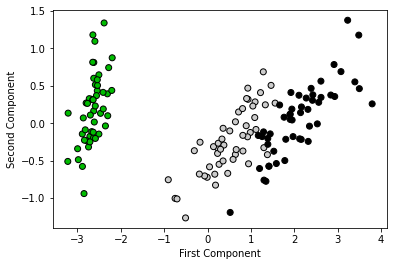

In [18]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(x)
X = pca.transform(x)

# Reorder the labels to have colors matching the cluster results
Y = np.choose(y, [1, 2, 0]).astype(float)
_=plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.nipy_spectral, edgecolor='k')
_=plt.xlabel("First Component")
_=plt.ylabel("Second Component")

## PCA Dimension Reduction (My Solution)

### Calculate Mean

$$
\mu_{ML} = \frac{1}{N} \sum_i^N x_i
$$

In [19]:
def calc_mean(x):
    return np.mean(x, axis=0)

mu_x = calc_mean(x)
print("mu_x:", np.round(mu_x, 3))
print("Note: Numbers are rounded for simplicity")

mu_x: [5.843 3.057 3.758 1.199]
Note: Numbers are rounded for simplicity


### Calculate Covariance

$$
\sigma^2_{ML} = \frac{1}{N} \sum_i^N (x_i - \mu_{ML})^2
$$

In [20]:
def calc_cov(x):
    n = x.shape[0] # number of samples
    x_norm = x - calc_mean(x) # normalized x
    cov = (1/n) * x_norm.T @ x_norm # estimating cov
    return cov

cov_x = calc_cov(x)
print("cov_x:\n", np.round(cov_x, 3))
print("Note: Numbers are rounded for simplicity")

cov_x:
 [[ 0.681 -0.042  1.266  0.513]
 [-0.042  0.189 -0.327 -0.121]
 [ 1.266 -0.327  3.096  1.287]
 [ 0.513 -0.121  1.287  0.577]]
Note: Numbers are rounded for simplicity


### Apply SVD to Covariance Matrix

$$
cov(X) = C = U \Lambda U^T \\
$$

In [21]:
# Applying SVD to covariance matrix and reconstructing it

u, s, vh = np.linalg.svd(cov_x)   # Apply SVD 
C = u @ (s*np.eye(4)) @ u.T       # Reconstruct C == cov(x)

print("C:\n", np.round(C, 3))
print("Note: Numbers are rounded for simplicity")

C:
 [[ 0.681 -0.042  1.266  0.513]
 [-0.042  0.189 -0.327 -0.121]
 [ 1.266 -0.327  3.096  1.287]
 [ 0.513 -0.121  1.287  0.577]]
Note: Numbers are rounded for simplicity


### Apply Dimension Reduction

$$
X = (U U^T) X = U (U^T X) = UH
$$

Note: Formula above is for column-matrix forms. Data $x$ is in row-matrix form so we are using it's transpose in the code. For covariance since `cov_x = cov_x.T` it doesn't matter.

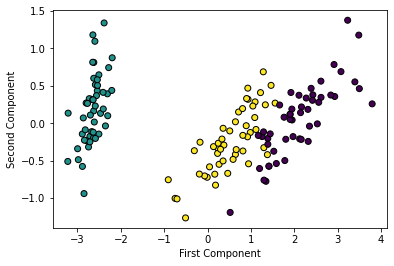

In [22]:
# Dimension Reduction

x_ = x - mu_x           # Normalize x
u_ = u[:,:2]            # Keep best 2 out of 4 principal components
h = (u_.T @ x_.T).T     # Reconstruct using 2 best components 

# Visualize
h_ = h*-1               # Somehow Scipy multiplies data with -1. To make my solution look same I did it too
Y = np.choose(y, [1, 2, 0]).astype(float)
_=plt.scatter(h_[:,0], h_[:,1], c=Y, edgecolor='k')
_=plt.xlabel("First Component")
_=plt.ylabel("Second Component")

### Reconstruct Data Using Some Principal Components

$$
X = UH
$$

In [23]:
# Reconstruct data from dimension reduction applied data space

x_reduced = (u_ @ h.T).T
x_reduced += mu_x

### Calculate Average Truncation Error

$$
\epsilon = \frac{1}{N} \sum_i ||\vec x_i - \vec y_i ||^2 = \sum^m_{j=k+1} \lambda_j
$$

In [24]:
# Method-1 using the first expression
def avg_truncation_error_1(x_reduced, x_norm):
    return np.sum(np.linalg.norm(x_reduced - x_norm, axis=1)**2 / x.shape[0])

# Method-2 using the first expression
def avg_truncation_error_2(s, k):
    return np.sum( s[k+1:] )  

print("Average Truncation Error (Method-1):", avg_truncation_error_1(x_reduced, x))
print("Average Truncation Error (Method-2):", avg_truncation_error_2(s, 1))

Average Truncation Error (Method-1): 0.10136429572959299
Average Truncation Error (Method-2): 0.10136429572959303


In [25]:
# Check error with the Sklearn solution

x_reduced_sklearn = pca.inverse_transform(X)
print("Average Truncation Error (For Sklearn Solution):", avg_truncation_error_1(x_reduced_sklearn, x))

Average Truncation Error (For Sklearn Solution): 0.10136429572959299


# PCA Dimension Reduction Visualization

## Generate Data

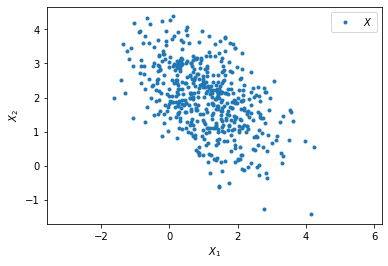

In [26]:
mean = [1, 2]
cov = [[1, -0.5], [-0.5, 1]]  # diagonal covariance
x = np.random.multivariate_normal(mean, cov, 500)
plt.axis('equal')
plt.plot(x[:,0], x[:,1], ".", label="$X$")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
_=plt.legend()

## Apply Dimension Reduction

In [27]:
mu_x = calc_mean(x)
print("mu_x:", np.round(mu_x, 3),"\n")

cov_x = calc_cov(x)
print("cov_x:\n", np.round(cov_x, 3),"\n")

# Apply SVD
u, s, vh = np.linalg.svd(cov_x)   
print("u (eigen vectors):\n", u,"\n")
print("s (eigen values):", s,"\n")

# Dimension Reduction
x_ = x - mu_x           # Normalize x
u_ = u[:,:1]            # Keep best 1 out of 2 principal components
h = (u_.T @ x_.T).T     # Reconstruct using 2 best components
print("u_:\n", u_,"\n")

# Reconstruct data from dimension reduction applied data
x_reduced = (u_ @ h.T).T
x_reduced += mu_x

mu_x: [1.088 1.958] 

cov_x:
 [[ 1.071 -0.516]
 [-0.516  1.025]] 

u (eigen vectors):
 [[-0.72265124  0.69121283]
 [ 0.69121283  0.72265124]] 

s (eigen values): [1.56428395 0.53152447] 

u_:
 [[-0.72265124]
 [ 0.69121283]] 



## Plot Principal Components

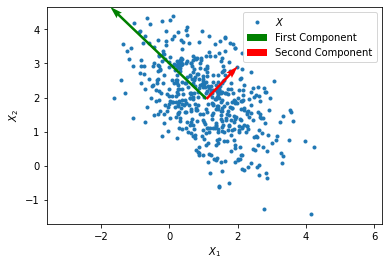

In [28]:
x0, y0, u0, v0 = mu_x[0], mu_x[1], u[0,0]*s[0], u[0,1]*s[0]
x1, y1, u1, v1 = mu_x[0], mu_x[1], u[1,0]*s[1], u[1,1]*s[1]

plt.plot(x[:,0], x[:,1], ".", label="$X$")
plt.quiver(x0, y0, u0, v0, units='xy' ,scale=0.4, zorder=5.0, label="First Component", color="g")
plt.quiver(x1, y1, u1, v1, units='xy' ,scale=0.4, zorder=5.0, label="Second Component", color="r")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.axis('equal')
_=plt.legend()

## Plot Reconstructed Data

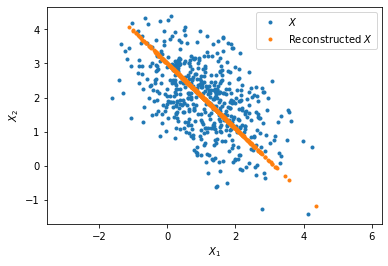

In [29]:
plt.axis('equal')
plt.plot(x[:,0], x[:,1], ".", label="$X$")
plt.plot(x_reduced[:,0], x_reduced[:,1], ".", label="Reconstructed $X$")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
_=plt.legend()